# Lecture 11 notebook demo 2: Misspecified GLM models

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

import statsmodels.api as sm

In [24]:
turbines = pd.read_csv('turbines.csv')
# The "year" column contains how many years since the year 2000
turbines['year'] = turbines['p_year'] - 2000
turbines = turbines.drop('p_year', axis=1)
turbines.head()

,t_state,t_built,t_cap,year
0,AK,6,390.0,-3.0
1,AK,6,475.0,-1.0
2,AK,2,100.0,0.0
3,AK,1,1500.0,1.0
4,AK,1,100.0,2.0


<Figure size 432x288 with 0 Axes>

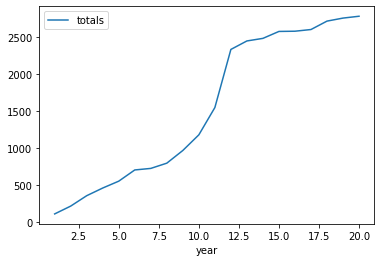

<Figure size 432x288 with 0 Axes>

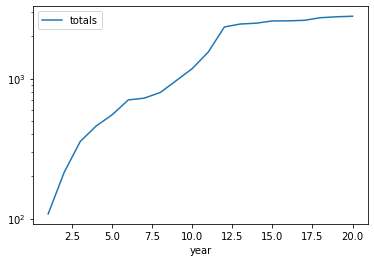

In [25]:
# Turbines in California
ca_filter = (turbines.t_state == 'CA') & (turbines.year >= 0)
ca_turbines = turbines[ca_filter].sort_values('year')
ca_turbines["totals"] = np.cumsum(ca_turbines["t_built"])
# Log-transform the counts, too
ca_turbines["log_totals"] = np.log(ca_turbines["totals"])

plt.figure()
ca_turbines.plot('year', 'totals')
plt.show()

plt.figure()
ca_turbines.plot('year', 'totals')
plt.semilogy()
plt.show()

In [26]:
gaussian_model = sm.GLM(
    ca_turbines.totals, sm.add_constant(ca_turbines.year), 
    family=sm.families.Gaussian()
)
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 totals   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          73857.
Method:                          IRLS   Log-Likelihood:                -139.42
Date:                Sat, 20 Feb 2021   Deviance:                   1.3294e+06
Time:                        17:21:22   Pearson chi2:                 1.33e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -206.2526    126.244     -1.634      0.1

In [27]:
negbin_model = sm.GLM(
    ca_turbines.totals, sm.add_constant(ca_turbines.year),
    family=sm.families.NegativeBinomial()
)
negbin_results = negbin_model.fit()
print(negbin_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 totals   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -161.18
Date:                Sat, 20 Feb 2021   Deviance:                       1.9205
Time:                        17:21:22   Pearson chi2:                     1.64
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4613      0.465     11.743      0.0

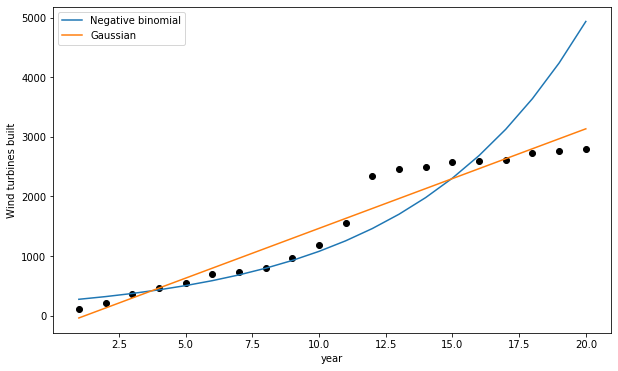

In [28]:
plt.figure(figsize = (10,6))
plt.scatter(ca_turbines["year"], ca_turbines["totals"], c = "k")
plt.plot(ca_turbines["year"], 
         negbin_results.predict(sm.add_constant(ca_turbines.year)).values, 
         label = "Negative binomial")
plt.plot(ca_turbines["year"],
         gaussian_results.predict(sm.add_constant(ca_turbines.year)).values, 
         label = "Gaussian")
plt.xlabel("year")
plt.ylabel("Wind turbines built")
plt.legend()
plt.show()